# CLASIFICACIÓN DE SOLICITUDES DE CRÉDITO UTILIZANDO DEEP LEARNING

## MODELOS DE CLASIFICACIÓN

In [138]:
import warnings
warnings.filterwarnings("ignore")

## Importe librerías

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing 

## Importe de datos

Los datos se importan desde el NOTEBOOK preprocesamiento

In [5]:
df = pd.read_pickle('HCData.pkl')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PCB_Canceled,PCB_Demand,PCB_Returned_store,PCB_Signed,pcb_FUTURE_mean,pcb_FUTURE_min,pcb_FUTURE_max,pcb_DPD_mean,pcb__DPD_min,pcb__DPD_max
0,100043,0,1,1,0,1,198000.0,641173.5,-768,-63.0,...,0,0,0,0,34.324324,0.0,60.0,0.0,0,0
1,100043,0,1,1,0,1,198000.0,641173.5,-768,-63.0,...,0,0,0,0,34.324324,0.0,60.0,0.0,0,0
2,100048,0,1,1,0,1,202500.0,604152.0,-475,-3148.0,...,0,0,0,0,13.437500,0.0,18.0,0.0,0,0
3,100050,0,1,1,0,1,108000.0,746280.0,365243,-5745.0,...,0,0,0,0,16.500000,9.0,24.0,0.0,0,0
4,100050,0,1,1,0,1,108000.0,746280.0,365243,-5745.0,...,0,0,0,0,16.500000,9.0,24.0,0.0,0,0


In [6]:
df.shape

(176688, 191)

In [7]:
df['CREDIT_ACTIVE'].value_counts()

Closed      111043
Active       64947
Sold           697
Bad debt         1
Name: CREDIT_ACTIVE, dtype: int64

In [6]:
dfD = pd.get_dummies(df.CREDIT_ACTIVE)

In [7]:
dfD = dfD.rename({
    "Active":'TT_CREDIT_ACTIVE_Active',
    "Closed":'TT_CREDIT_ACTIVE_Closed',
    "Sold":'TT_CREDIT_ACTIVE_Sold'
})

dfD = dfD.drop(['Bad debt'], axis = 1)

df = pd.concat([df, dfD], axis = 1)

In [8]:
df = df.drop(['CREDIT_ACTIVE'], axis = 1)

## Definición de conjuntos Y y X

In [9]:
Y = df.TARGET
X = df.drop(['TARGET', 'SK_ID_CURR'], axis = 1)

## Perfiles de Usuario

In [10]:
# normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

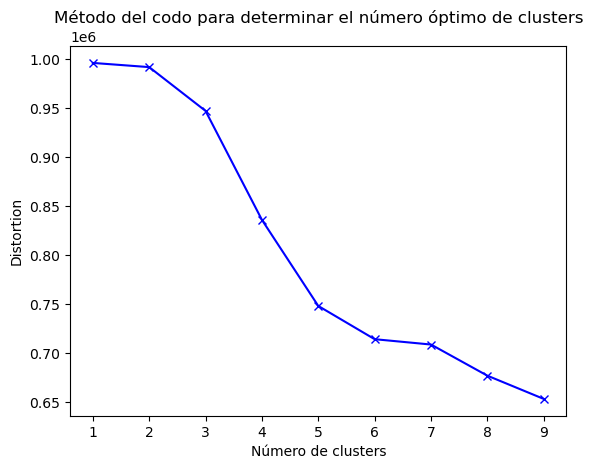

In [140]:
#*Método del codo:*

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Graficar la variación de la suma de distancias en función del número de clusters
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Distortion')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

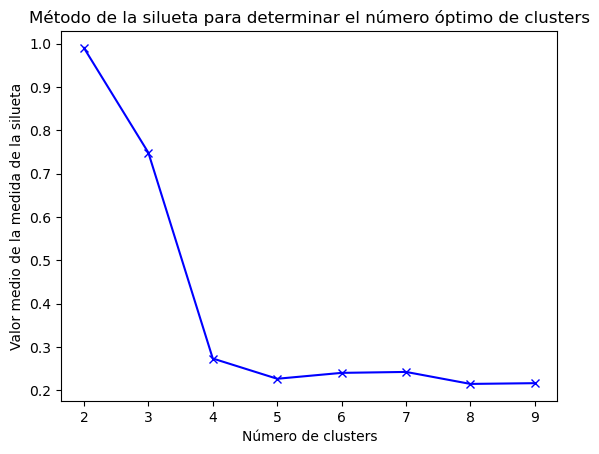

In [19]:
#*Método de la silueta:*

from sklearn.metrics import silhouette_score

# Evaluar la calidad del clustering utilizando el método de la silueta
silhouette_scores = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Graficar la variación del valor medio de la medida de la silueta en función del número de clusters
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Valor medio de la medida de la silueta')
plt.title('Método de la silueta para determinar el número óptimo de clusters')
plt.show()

In [ ]:
#%pip install gap-stat

In [ ]:
#*Método de la gap statistic:*

"""from scipy.spatial.distance import cdist
from gap_statistic import OptimalK

# Calcular la medida de la gap statistic para diferentes valores de k
optimalK = OptimalK(n_jobs=-1)
n_clusters = optimalK(X, cluster_array=np.arange(1, 10))
print('Número óptimo de clusters:', n_clusters)

# Graficar la variación de la medida de la gap statistic en función del número de clusters
gap_df = optimalK.gap_df_
plt.plot(gap_df.n_clusters, gap_df.gap_value, linestyle='--', marker='o', color='b')
plt.ylabel('Gap Value')
plt.xlabel('Número de clusters')
plt.title('Método de la gap statistic para determinar el número óptimo de clusters')
plt.show()"""

In [11]:
#KMEANS
from sklearn.cluster import KMeans
# entrenar modelo k-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# obtener etiquetas de cluster y centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [12]:
clusters = pd.DataFrame(labels, 
                    columns=['CLUSTER'])
clusters.head()

,CLUSTER
0,0
1,0
2,3
3,3
4,3


In [21]:
#df = df.drop(df.CLUSTER, axis = 1)
#df.head()

## PCA

In [13]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [14]:
# PCA
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

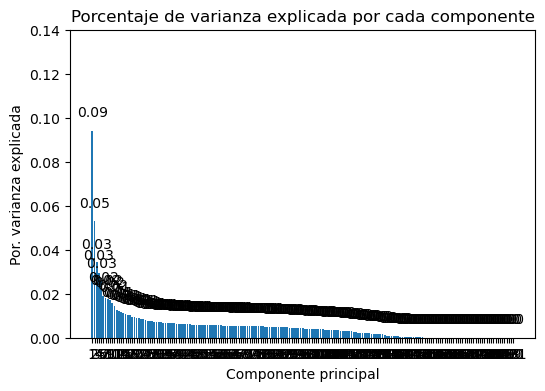

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.14)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.09411725 0.1470073  0.18122922 0.21056426 0.2363638  0.25543551
 0.27356175 0.29133649 0.30835499 0.32413768 0.33876396 0.3512113
 0.36356644 0.37527301 0.38632746 0.39731796 0.40786353 0.41804678
 0.42760746 0.43700181 0.44612998 0.45492135 0.46358287 0.47220089
 0.48047285 0.4882508  0.49577137 0.50314811 0.51038386 0.51755563
 0.52462185 0.53163064 0.53850343 0.54526781 0.55198433 0.55866726
 0.56526848 0.57182915 0.57828913 0.58465428 0.59092755 0.59715183
 0.60325653 0.60934468 0.61537299 0.62137109 0.62736007 0.63325603
 0.63914707 0.64500704 0.65084763 0.65664802 0.66239336 0.66812852
 0.67380726 0.67944024 0.6850566  0.69066022 0.69622695 0.70177538
 0.70730136 0.71280866 0.71830264 0.72378075 0.72923766 0.73468457
 0.74012711 0.74553522 0.75093545 0.75632377 0.76165675 0.76696577
 0.77225974 0.77750464 0.78272504 0.78790692 0.7930606  0.79818882
 

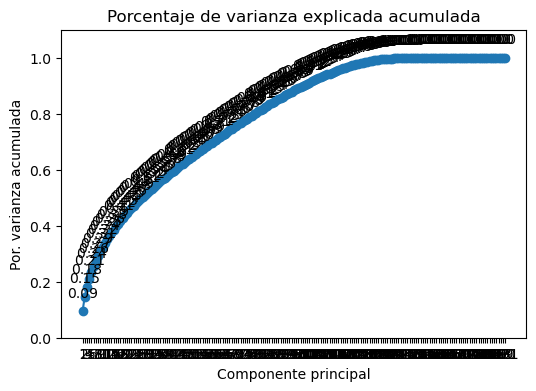

In [185]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

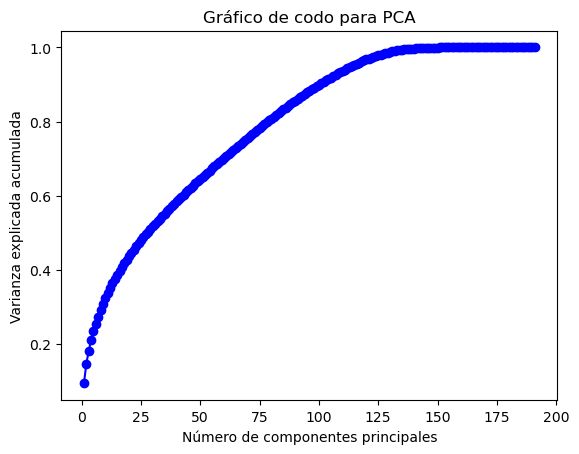

In [186]:
#pca = PCA()

# ajustar PCA a los datos
#pca.fit(X)

variance_ratio = modelo_pca.explained_variance_ratio_

# calcular la suma acumulativa de la varianza explicada
cumulative_variance_ratio = [sum(variance_ratio[:i+1]) for i in range(len(variance_ratio))]

# crear el gráfico de codo
fig, ax = plt.subplots()
ax.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, 'bo-')
ax.set_xlabel('Número de componentes principales')
ax.set_ylabel('Varianza explicada acumulada')
ax.set_title('Gráfico de codo para PCA')

plt.show()

In [15]:
valores_propios_df = pd.DataFrame({'Componente': range(1, modelo_pca.n_components_+1),
                                   'Valor propio': modelo_pca.explained_variance_})

In [16]:
len(valores_propios_df[valores_propios_df['Valor propio'] > 1])

62

In [17]:
valores_propios_df[valores_propios_df['Valor propio'] > 1]

,Componente,Valor propio
0,1,17.129437
1,2,9.626042
2,3,6.228425
3,4,5.339008
4,5,4.695542
...,...,...
57,58,1.019864
58,59,1.013150
59,60,1.009820
60,61,1.005734


In [18]:
X_transformado = modelo_pca.transform(X)[:, :62]

In [20]:
len(X_transformado)

176688

In [19]:
XPCA = pd.DataFrame(X_transformado, 
                    columns=['COMP1', 'COMP2','COMP3','COMP4','COMP5','COMP6','COMP7','COMP8','COMP9','COMP10',
                            'COMP11', 'COMP12','COMP13','COMP14','COMP15','COMP16','COMP17','COMP18','COMP19','COMP20',
                            'COMP21', 'COMP22','COMP23','COMP24','COMP25','COMP26','COMP27','COMP28','COMP29','COMP30',
                            'COMP31', 'COMP32','COMP33','COMP34','COMP35','COMP36','COMP37','COMP38','COMP39','COMP40',
                            'COMP41', 'COMP42','COMP43','COMP44','COMP45','COMP46','COMP47','COMP48','COMP49','COMP50',
                            'COMP51', 'COMP52','COMP53','COMP54','COMP55','COMP56','COMP57','COMP58','COMP59','COMP60',
                            'COMP61', 'COMP62'])
XPCA.head()

,COMP1,COMP2,COMP3,COMP4,COMP5,COMP6,COMP7,COMP8,COMP9,COMP10,...,COMP53,COMP54,COMP55,COMP56,COMP57,COMP58,COMP59,COMP60,COMP61,COMP62
0,235459.914914,-210110.320070,-600055.558625,193618.607120,405119.850054,-609681.764653,-217628.035838,330298.209507,203800.814835,400995.924875,...,684517.409590,854946.718631,325191.073854,-425769.935116,90862.073507,-514884.552107,99903.594348,-411670.914943,-164676.893812,633269.867058
1,237223.963550,-208248.287409,-590531.997705,207623.101643,403577.970349,-606210.242173,-207920.375445,318244.610521,200662.322789,382778.344477,...,697151.244588,849223.112939,326016.763970,-430065.506275,84791.862652,-501395.244253,103691.345450,-423794.206333,-151386.885642,649255.793213
2,131640.360861,-128759.328878,-312622.363222,114354.074298,196317.293287,-345058.573942,-125756.778968,202291.677606,105388.639714,212067.414609,...,575127.854039,734498.444983,245997.428453,-385102.656172,72034.463984,-434681.250820,101581.963688,-345351.889623,-158432.801361,551469.160865
3,45653.029601,-76144.700820,-105180.641276,63602.531703,-56990.431474,-214957.978331,-7651.579633,48300.471374,35628.464249,77533.821964,...,653746.143517,894961.304074,239972.443023,-471360.238190,74735.212999,-526351.625462,133355.763687,-370190.485713,-226929.298836,649869.184435
4,45802.242140,-75967.684161,-104265.377086,65028.386670,-57090.222794,-214597.386237,-6761.854534,47215.732235,35330.413863,75718.087769,...,653354.808096,895589.373003,240386.872188,-470987.512148,73869.865410,-524931.461969,133951.883253,-371530.157012,-225716.515700,651650.284456


In [20]:
XPCA = pd.concat([XPCA, clusters], axis = 1)

## Creación de conjuntos Training y Testing

### se extrae una muestra del conjunto de X

In [169]:
Z = 1.96
P = Y.mean()
Q = 1- P
N = len(X)
e = 0.05

In [175]:
(Z*Z)*P*Q / (e*e)

122.05685183999996

In [176]:
(Z*Z)*Q / (e*e)*P

122.05685183999996

In [21]:
df1 = pd.concat([XPCA, df.TARGET], axis = 1)
#df1 = df1.sample(n = round(len(df1)/2), random_state= 22)
X = df1.drop(['TARGET'], axis = 1)
Y = df1.TARGET

In [46]:
dfSVM = df1.sample(n = 2000, random_state= 22)
XSVM = dfSVM.drop(['TARGET'], axis = 1)
YSVM = dfSVM.TARGET

In [173]:
len(clusters)

176688

In [201]:
df = pd.concat([df, clusters], axis = 1)

In [202]:
df.CLUSTER.value_counts()

3    74114
1    44915
0    43892
2    13767
Name: CLUSTER, dtype: int64

In [101]:
X = df1.drop(['TARGET'], axis = 1)
Y = df1.TARGET

In [176]:
X.head()

,COMP1,COMP2,COMP3,COMP4,COMP5,COMP6,COMP7,COMP8,COMP9,COMP10,...,COMP54,COMP55,COMP56,COMP57,COMP58,COMP59,COMP60,COMP61,COMP62,CLUSTER
0,235459.914914,-210110.320070,-600055.558625,193618.607120,405119.850054,-609681.764653,-217628.035838,330298.209507,203800.814835,400995.924875,...,854946.718631,325191.073853,-425769.935116,90862.073507,-514884.552107,99903.594348,-411670.914943,-164676.893812,633269.867058,0
1,237223.963550,-208248.287409,-590531.997705,207623.101643,403577.970349,-606210.242173,-207920.375445,318244.610521,200662.322789,382778.344477,...,849223.112939,326016.763970,-430065.506275,84791.862652,-501395.244252,103691.345450,-423794.206333,-151386.885642,649255.793214,0
2,131640.360861,-128759.328878,-312622.363222,114354.074298,196317.293287,-345058.573942,-125756.778968,202291.677606,105388.639714,212067.414609,...,734498.444983,245997.428453,-385102.656172,72034.463984,-434681.250819,101581.963689,-345351.889623,-158432.801361,551469.160865,3
3,45653.029601,-76144.700820,-105180.641276,63602.531703,-56990.431474,-214957.978331,-7651.579633,48300.471374,35628.464249,77533.821964,...,894961.304074,239972.443023,-471360.238190,74735.212999,-526351.625462,133355.763687,-370190.485713,-226929.298835,649869.184435,3
4,45802.242140,-75967.684161,-104265.377086,65028.386670,-57090.222794,-214597.386237,-6761.854534,47215.732235,35330.413863,75718.087769,...,895589.373004,240386.872188,-470987.512148,73869.865410,-524931.461969,133951.883253,-371530.157012,-225716.515700,651650.284457,3


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=22, stratify = Y)

In [47]:
X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(XSVM, YSVM, random_state=22, stratify = YSVM)

In [141]:
Cluster_train = X_train.CLUSTER
Cluster_test = X_test.CLUSTER

X_train = X_train.drop(['CLUSTER'], axis = 1)  
X_test = X_test.drop(['CLUSTER'], axis = 1)

AttributeError: 'DataFrame' object has no attribute 'CLUSTER'

In [48]:
Cluster_trainSVM = X_trainSVM.CLUSTER
Cluster_testSVM = X_testSVM.CLUSTER

X_trainSVM = X_trainSVM.drop(['CLUSTER'], axis = 1)  
X_testSVM = X_testSVM.drop(['CLUSTER'], axis = 1)

In [142]:
print("X_train :", len(X_train))
print("y_train :", len(y_train))
print("X_test :", len(X_test))
print("y_test :", len(y_test))

X_train : 132516
y_train : 132516
X_test : 44172
y_test : 44172


In [29]:
print("%TARGET_Y", Y.mean())
print("%TARGET_Y_train", y_train.mean())
print("%TARGET_Y_test", y_test.mean())

%TARGET_Y 0.08875532011228833
%TARGET_Y_train 0.08875154698300583
%TARGET_Y_test 0.08876663950013583


In [30]:
X.CLUSTER.value_counts()

3    74114
1    44915
0    43892
2    13767
Name: CLUSTER, dtype: int64

In [31]:
Cluster_train.value_counts() / len(Cluster_train)

3    0.419693
1    0.254007
0    0.248106
2    0.078194
Name: CLUSTER, dtype: float64

In [32]:
Cluster_test.value_counts() / len(Cluster_test)

3    0.418772
1    0.254799
0    0.249343
2    0.077085
Name: CLUSTER, dtype: float64

In [186]:
X_train.columns.values

array(['COMP1', 'COMP2', 'COMP3', 'COMP4', 'COMP5', 'COMP6', 'COMP7',
       'COMP8', 'COMP9', 'COMP10', 'COMP11', 'COMP12', 'COMP13', 'COMP14',
       'COMP15', 'COMP16', 'COMP17', 'COMP18', 'COMP19', 'COMP20',
       'COMP21', 'COMP22', 'COMP23', 'COMP24', 'COMP25', 'COMP26',
       'COMP27', 'COMP28', 'COMP29', 'COMP30', 'COMP31', 'COMP32',
       'COMP33', 'COMP34', 'COMP35', 'COMP36', 'COMP37', 'COMP38',
       'COMP39', 'COMP40', 'COMP41', 'COMP42', 'COMP43', 'COMP44',
       'COMP45', 'COMP46', 'COMP47', 'COMP48', 'COMP49', 'COMP50',
       'COMP51', 'COMP52', 'COMP53', 'COMP54', 'COMP55', 'COMP56',
       'COMP57', 'COMP58', 'COMP59', 'COMP60', 'COMP61', 'COMP62'],
      dtype=object)

## Balanceo del conjunto de entrenamiento

In [76]:
#%pip install imblearn

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

In [34]:
# Supongamos que el dataframe se llama df
mask = X_train.dtypes == 'object'
df_object = X_train.loc[:, mask]
print(df_object)

Empty DataFrame
Columns: []
Index: [118327, 36493, 143831, 140585, 98940, 26224, 74652, 148003, 16252, 101121, 1658, 103753, 137322, 148967, 164904, 166592, 93197, 35360, 36753, 91744, 36983, 12705, 44524, 77751, 58795, 126568, 34909, 64956, 78920, 73971, 33721, 156251, 150876, 105676, 128256, 131335, 109956, 53104, 60794, 10941, 69257, 25952, 2669, 124624, 44158, 145111, 100954, 48437, 149865, 32473, 169435, 144829, 175933, 9510, 52520, 167916, 76389, 342, 161782, 3120, 59196, 44498, 103431, 169904, 176128, 53950, 164600, 140246, 70995, 70843, 155224, 122465, 60740, 80553, 75663, 153055, 115729, 99783, 46748, 154101, 5024, 130795, 40033, 40932, 39171, 161391, 47408, 84855, 173716, 157364, 145245, 3523, 6916, 53544, 26986, 151598, 89654, 62203, 137199, 40087, ...]

[132516 rows x 0 columns]


In [143]:
# Aplicar SMOTE
Xtrain = X_train
ytrain = y_train
sm = SMOTE(random_state=110322)
Xtrain, ytrain = sm.fit_resample(Xtrain, ytrain)

In [149]:
print(ytrain.mean())
print('ytrain: ', len(ytrain))
print('y_train: ', len(y_train))
print('Xtrain: ', len(Xtrain))
print('X_train: ', len(X_train))

0.5
ytrain:  241510
y_train:  132516
Xtrain:  241510
X_train:  132516


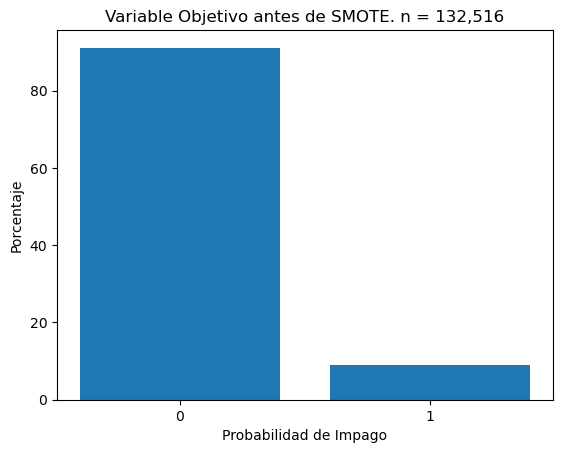

<Figure size 640x480 with 0 Axes>

In [154]:
# Calcular el porcentaje de cada categoría en la variable 'y_train'
target_counts = y_train.value_counts()
target_percentages = target_counts / len(y_train) * 100

# Configurar el gráfico de barras
plt.bar(target_percentages.index.astype(str), target_percentages)

# Etiquetas y título del gráfico
plt.xlabel('Probabilidad de Impago')
plt.ylabel('Porcentaje')
plt.title('Variable Objetivo antes de SMOTE. n = 132,516')

# Mostrar el gráfico
plt.show()
plt.savefig('noSMOTE.png')

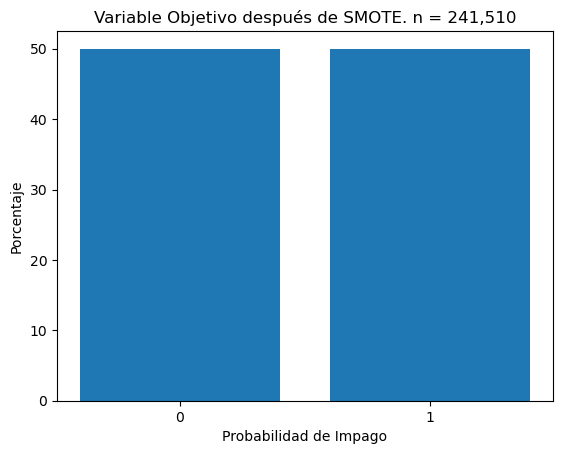

<Figure size 640x480 with 0 Axes>

In [153]:
# Calcular el porcentaje de cada categoría en la variable 'y_train'
target_counts = ytrain.value_counts()
target_percentages = target_counts / len(ytrain) * 100

# Configurar el gráfico de barras
plt.bar(target_percentages.index.astype(str), target_percentages)

# Etiquetas y título del gráfico
plt.xlabel('Probabilidad de Impago')
plt.ylabel('Porcentaje')
plt.title('Variable Objetivo después de SMOTE. n = 241,510')

# Mostrar el gráfico
plt.show()
plt.savefig('SMOTE.png')

In [25]:
# Aplicar SMOTE
sm = SMOTE(random_state=110322)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [49]:
# Aplicar SMOTE
sm = SMOTE(random_state=110322)
X_trainSVM, y_trainSVM = sm.fit_resample(X_trainSVM, y_trainSVM)

In [139]:
print(y_train.mean())
print(len(y_train))
print(len(X_train))

0.5
241510
241510


In [36]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

# Definir el objeto scorer utilizando el F1-Score con pos_label=1 (clase positiva)
scorer = make_scorer(f1_score, pos_label=1)

@book{thakur2020approaching,
  title={Approaching (almost) any machine learning problem},
  author={Thakur, Abhishek},
  year={2020},
  publisher={Abhishek Thakur}
}

## REGRESIÓN LOGÍSTICA

In [197]:
#instanciamos la regresión logística
logreg = LogisticRegression().fit(X_train, y_train)

In [161]:
print("Back Testing set score: ", logreg.score(X_test, y_test))
print("Train set score: ", logreg.score(X_train, y_train))

Back Testing set score:  0.5774472516526307
Train set score:  0.5783777069272494


In [162]:
scores = cross_val_score(logreg, X_train, y_train, cv=10);
print("Average cross-validation score: ", scores.mean())

Average cross-validation score:  0.5775371620222765


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=22)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, X_train, y_train, cv=kfold)))

In [198]:
y_pred_rl = logreg.predict(X_test)

## SVM

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import model_selection

In [30]:
%%time
pipe_svm = Pipeline([
    ('preprocessing', StandardScaler()),
    ('classifier', SVC())
])

CPU times: user 31 µs, sys: 9 µs, total: 40 µs
Wall time: 44.1 µs


In [36]:
# List of C values
C_range = np.logspace(-10, 10, 21)
print(f'The list of values for C are {C_range}')

# List of gamma values
gamma_range = np.logspace(-10, 10, 21)
print(f'The list of values for gamma are {gamma_range}')

The list of values for C are [1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10]
The list of values for gamma are [1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10]


#### Kernel Lineal

In [100]:
#sin kernel
#param_grid_svm = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 
#              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#con kernel lineal
param_grid_svm_lineal = {
    "C": C_range,
    'classifier__kernel': ['linear'],
    "gamma": gamma_range.tolist()+['scale', 'auto']
}

In [ ]:
%%time
grid_lineal = GridSearchCV(pipe_svm, param_grid=param_grid_svm_lineal, scoring = scorer, cv=5)
grid_lineal.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.4f}".format(grid_lineal.best_score_))
print("Test set score: {:.4f}".format(grid_lineal.score(X_test, y_test)))
print("Best parameters: {}".format(grid_lineal.best_params_))

### Kernel Gaussiano

In [42]:
#sin kernel
#param_grid_svm = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 
#              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#con kernel rbf
param_grid_svm_rbf = {
    'classifier__C': C_range,
    'classifier__kernel': ['rbf'],
    'classifier__gamma': gamma_range.tolist()+['scale', 'auto']
}

In [53]:
%%time
grid_rbf = model_selection.RandomizedSearchCV(pipe_svm, param_distributions=param_grid_svm_rbf, n_iter=10, scoring = scorer,  cv=10)
grid_rbf.fit(X_trainSVM, y_trainSVM)
print("Best cross-validation accuracy: {:.4f}".format(grid_rbf.best_score_))
print("Test set score: {:.4f}".format(grid_rbf.score(X_testSVM, y_testSVM)))
print("Best parameters: {}".format(grid_rbf.best_params_))

Best cross-validation accuracy: 0.9356
Test set score: 0.2564
Best parameters: {'classifier__kernel': 'rbf', 'classifier__gamma': 0.1, 'classifier__C': 1000000000.0}
CPU times: user 2h 31min 34s, sys: 220 ms, total: 2h 31min 34s
Wall time: 2h 31min 33s


In [ ]:
model_SVM = Pipeline([
    ('preprocessing', StandardScaler()),
    ('classifier', SVC(kernel='rbf', gamma=0.1, C=1000000000.0))
])

# Entrenar el modelo con tus datos de entrenamiento
model_SVM.fit(X_train, y_train)
print("Test-set score: {:.6f}".format(model_SVM.score(X_test, y_test)))

In [ ]:
y_pred_svm = grid.predict(X_test)

## RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
pipe_rf = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier())])

In [201]:
param_grid = {
    'preprocessing__with_mean': [True, False],
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_depth': [None, 5, 10]
}

In [206]:
%%time

cv = KFold(n_splits=10, shuffle=True, random_state=42) 

grid_rf = grid = GridSearchCV(pipe_rf, param_grid=param_grid, cv=cv, scoring='roc_auc')

rf = grid_rf.fit(X_train, y_train)

print("Best params:\n{}\n".format(rf.best_params_))
print("Best cross-validation score: {:.6f}".format(rf.best_score_))
print("Test-set score: {:.6f}".format(rf.score(X_test, y_test)))

Best params:
{'classifier__max_depth': None, 'classifier__n_estimators': 100, 'preprocessing__with_mean': True}

Best cross-validation score: 0.999451
Test-set score: 0.965506


In [253]:
y_pred_rf = rf.predict(X_test) 

In [238]:
len(y_pred_rf)

22086

In [240]:
len(y_test)

44172

## XGBoost

In [207]:
#%pip install xgboost

In [208]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

In [209]:
# Definir el pipeline
pipeline_xgb = Pipeline([
    ('preprocessing', StandardScaler()),
    ('classifier', XGBClassifier())
])

In [210]:
# Definir los parámetros para GridSearchCV
param_grid_xgb = {
    'preprocessing__with_mean': [True, False],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_depth': [3, 5, 10]
}

In [213]:
# define el objeto GridSearchCV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(pipeline_xgb, param_grid=param_grid_xgb, cv=cv, scoring='roc_auc')

In [214]:
%%time
# ajusta el modelo con los datos
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.1, 0.01],
                         'classifier__max_depth': [3, 5, 10],
                         'classifier__n_estimators': [10, 50, 100],
                         'preprocessing__with_mean': [True, False]},
             scoring='roc_auc')

In [215]:
# imprime los resultados
print("Mejores parámetros encontrados: ", xgb_grid_search.best_params_)
print("Mejor score: ", xgb_grid_search.best_score_)
print("Test-set score: {:.6f}".format(xgb_grid_search.score(X_test, y_test)))

Mejores parámetros encontrados:  {'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'preprocessing__with_mean': True}
Mejor score:  0.9860710098979754
Test-set score: 0.923606


In [216]:
y_pred_xgb = xgb_grid_search.predict(X_test)

## CatBoost

In [217]:
#%pip install catboost

In [218]:
from catboost import CatBoostClassifier

In [219]:
# Definir el pipeline
pipeline_cb = Pipeline([
    ('preprocessing', StandardScaler()),
    ('classifier', CatBoostClassifier(verbose=False))
])

In [220]:
# Definir los parámetros a explorar con GridSearchCV
parameters_cb = {
    'classifier__iterations': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1],
    'classifier__depth': [4, 6, 8]
}

In [258]:
# Definir la estrategia de validación cruzada
cv_strategy = KFold(n_splits=10)

# Definir el objeto GridSearchCV
cb_grid_search = GridSearchCV(pipeline_cb, parameters_cb, cv=cv_strategy, verbose=False)
# Definir el objeto GridSearchCV

In [259]:
%%time
# Entrenar el modelo con los datos
cb_grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y la precisión promedio
print('Best parameters:', cb_grid_search.best_params_)
print('Cross-validation accuracy:', cb_grid_search.best_score_)
print("Test-set score: {:.6f}".format(cb_grid_search.score(X_test, y_test)))

Best parameters: {'classifier__depth': 8, 'classifier__iterations': 200, 'classifier__learning_rate': 1}
Cross-validation accuracy: 0.9270630615709494
Test-set score: 0.910803


In [260]:
y_pred_cb = cb_grid_search.predict(X_test)

## LightGBM

In [224]:
#%pip install lightgbm

In [225]:
from lightgbm import LGBMClassifier

In [226]:
# Definir el pipeline
pipeline_lgbm = Pipeline([
    ('preprocessing', StandardScaler()),
    ('classifier', LGBMClassifier())
])

In [227]:
# Definir los parámetros a explorar con GridSearchCV
parameters_lgbm = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1],
    'classifier__max_depth': [4, 6, 8]
}

In [261]:
# Definir la estrategia de validación cruzada
cv_strategy = KFold(n_splits=10)

# Definir el objeto GridSearchCV
lbgm_grid_search = GridSearchCV(pipeline_lgbm, parameters_lgbm, cv=cv_strategy)

In [262]:
%%time
# Entrenar el modelo con los datos
lbgm_grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y la precisión promedio
print('Best parameters:', lbgm_grid_search.best_params_)
print('Cross-validation accuracy:', lbgm_grid_search.best_score_)
print("Test-set score: {:.6f}".format(lbgm_grid_search.score(X_test, y_test)))

Best parameters: {'classifier__learning_rate': 1, 'classifier__max_depth': 8, 'classifier__n_estimators': 200}
Cross-validation accuracy: 0.9251790816115275
Test-set score: 0.888300


In [263]:
y_pred_lgbm = lbgm_grid_search.predict(X_test)

In [ ]:
## Emsamble Voting Classification

In [266]:
%%time
from sklearn.ensemble import VotingClassifier

# Crear el modelo de ensamblaje con votación mayoritaria
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb_grid_search),
    ('lgb', lbgm_grid_search),
    ('catboost', cb_grid_search)
], voting='hard')

# Entrenar el modelo de ensamblaje
ensemble_model.fit(X_train, y_train)

print("Test-set score: {:.6f}".format(ensemble_model.score(X_test, y_test)))

Test-set score: 0.960880
CPU times: user 2d 9min 18s, sys: 24min 9s, total: 2d 33min 28s
Wall time: 7h 2min 47s


In [274]:
y_ensemble_model = ensemble_model.predict(X_test)

In [267]:
# Obtener las predicciones y probabilidades de cada estimador individual
for name, estimator in ensemble_model.named_estimators_.items():
    predictions = estimator.predict(X_test)
    probabilities = estimator.predict_proba(X_test)
    
    # Imprimir las predicciones y probabilidades para cada estimador
    print(f"Estimador: {name}")
    print(f"Predicciones: {predictions}")
    print(f"Probabilidades: {probabilities}")
    print()

Estimador: rf
Predicciones: [0 0 0 ... 0 0 0]
Probabilidades: [[0.9  0.1 ]
 [0.94 0.06]
 [0.96 0.04]
 ...
 [0.97 0.03]
 [0.9  0.1 ]
 [0.98 0.02]]

Estimador: xgb
Predicciones: [0 0 0 ... 0 0 0]
Probabilidades: [[0.712947   0.28705302]
 [0.8608879  0.13911214]
 [0.7547652  0.24523479]
 ...
 [0.88173187 0.11826814]
 [0.90659    0.09341003]
 [0.91685426 0.08314573]]

Estimador: lgb
Predicciones: [0 0 0 ... 0 0 0]
Probabilidades: [[7.55453801e-01 2.44546199e-01]
 [9.98145318e-01 1.85468245e-03]
 [9.96735004e-01 3.26499582e-03]
 ...
 [9.66722065e-01 3.32779352e-02]
 [9.89449131e-01 1.05508694e-02]
 [9.99977381e-01 2.26191991e-05]]

Estimador: catboost
Predicciones: [0 0 0 ... 0 0 0]
Probabilidades: [[7.09803185e-01 2.90196815e-01]
 [9.99076591e-01 9.23409477e-04]
 [9.97627732e-01 2.37226805e-03]
 ...
 [9.99780349e-01 2.19651259e-04]
 [7.56869387e-01 2.43130613e-01]
 [9.96531407e-01 3.46859285e-03]]



## Comparación

### Matrices de confusión

In [231]:
#%pip install tabulate

In [232]:
from tabulate import tabulate

In [233]:
confusion_matrix_rl = pd.crosstab(
    y_test,
    y_pred_rl,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de Regresión Logística")
print(tabulate(confusion_matrix_rl, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de Regresión Logística
╒════════╤═══════╤═══════╕
│   Real │     0 │     1 │
╞════════╪═══════╪═══════╡
│      0 │ 22679 │ 17572 │
├────────┼───────┼───────┤
│      1 │  1611 │  2310 │
╘════════╧═══════╧═══════╛
---


In [234]:
"""confusion_matrix_svm = pd.crosstab(
    y_test,
    y_pred_svm,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de Support Vector Machine")
print(tabulate(confusion_matrix_svm, headers='keys', tablefmt='fancy_grid'))
print("---")"""

'confusion_matrix_svm = pd.crosstab(\n    y_test,\n    y_pred_svm,\n    rownames=[\'Real\'],\n    colnames=[\'Predicción\']\n)\nprint("Matriz de Confusion de Support Vector Machine")\nprint(tabulate(confusion_matrix_svm, headers=\'keys\', tablefmt=\'fancy_grid\'))\nprint("---")'

In [254]:
confusion_matrix_rf = pd.crosstab(
    y_test,
    y_pred_rf,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de Random Forest")
print(tabulate(confusion_matrix_rf, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de Random Forest
╒════════╤═══════╤══════╕
│   Real │     0 │    1 │
╞════════╪═══════╪══════╡
│      0 │ 40009 │  242 │
├────────┼───────┼──────┤
│      1 │  1055 │ 2866 │
╘════════╧═══════╧══════╛
---


In [255]:
confusion_matrix_xgb = pd.crosstab(
    y_test,
    y_pred_xgb,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de XGBoost")
print(tabulate(confusion_matrix_xgb, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de XGBoost
╒════════╤═══════╤══════╕
│   Real │     0 │    1 │
╞════════╪═══════╪══════╡
│      0 │ 37702 │ 2549 │
├────────┼───────┼──────┤
│      1 │   972 │ 2949 │
╘════════╧═══════╧══════╛
---


In [256]:
confusion_matrix_cb = pd.crosstab(
    y_test,
    y_pred_cb,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de CatBoost")
print(tabulate(confusion_matrix_cb, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de CatBoost
╒════════╤═══════╤═══════╕
│   Real │     0 │     1 │
╞════════╪═══════╪═══════╡
│      0 │ 21229 │ 19022 │
├────────┼───────┼───────┤
│      1 │  1481 │  2440 │
╘════════╧═══════╧═══════╛
---


In [257]:
confusion_matrix_lgbm = pd.crosstab(
    y_test,
    y_pred_lgbm,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de LightGBM")
print(tabulate(confusion_matrix_lgbm, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de LightGBM
╒════════╤═══════╤═══════╕
│   Real │     0 │     1 │
╞════════╪═══════╪═══════╡
│      0 │ 25157 │ 15094 │
├────────┼───────┼───────┤
│      1 │  1645 │  2276 │
╘════════╧═══════╧═══════╛
---


In [269]:
confusion_matrix_ensemble_model = pd.crosstab(
    y_test,
    y_ensemble_model,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de modelo de Ensamble")
print(tabulate(confusion_matrix_ensemble_model, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de modelo de Ensamble
╒════════╤═══════╤══════╕
│   Real │     0 │    1 │
╞════════╪═══════╪══════╡
│      0 │ 39678 │  573 │
├────────┼───────┼──────┤
│      1 │  1155 │ 2766 │
╘════════╧═══════╧══════╛
---


In [288]:
falsos_negativos = confusion_matrix_ensemble_model.iloc[1, 0]
suma_total = confusion_matrix_ensemble_model.values.sum()
print("Falsos Negativos:", falsos_negativos)
print("Suma total de la matriz de confusión:", suma_total)
print("Longuitud:", len(y_test))

Falsos Negativos: 1155
Suma total de la matriz de confusión: 44172
Longuitud: 44172


In [26]:
# Regresión Logística
import pickle

with open('logreg.pkl', 'rb') as archivo:
    logreg = pickle.load(archivo)
logreg

LogisticRegression()

In [27]:
# Random Forest
import pickle

with open('rf.pkl', 'rb') as archivo:
    rf = pickle.load(archivo)
rf

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 5, 10],
                         'classifier__n_estimators': [10, 50, 100],
                         'preprocessing__with_mean': [True, False]},
             scoring='roc_auc')

In [28]:
# XGBoost
import pickle

with open('xgb_grid_search.pkl', 'rb') as archivo:
    xgb_grid_search = pickle.load(archivo)
xgb_grid_search

[14:48:43] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.1, 0.01],
                         'classifier__max_depth': [3, 5, 10],
                         'classifier__n_estimators': [10, 50, 100],
                         'preprocessing__with_mean': [True, False]},
             scoring='roc_auc')

In [29]:
# XGBoost
import pickle

with open('cb_grid_search.pkl', 'rb') as archivo:
    cb_grid_search = pickle.load(archivo)
cb_grid_search

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x7f7a6119bbb0>)]),
             param_grid={'classifier__depth': array([10, 20, 30, 40, 50], dtype=int32),
                         'classifier__iterations': [50, 100, 200],
                         'classifier__learning_rate': [0.01, 0.1, 1]},
             verbose=False)

In [30]:
# XGBoost
import pickle

with open('lbgm_grid_search.pkl', 'rb') as archivo:
    lbgm_grid_search = pickle.load(archivo)
lbgm_grid_search

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', LGBMClassifier())]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 1],
                         'classifier__max_depth': [4, 6, 8],
                         'classifier__n_estimators': [50, 100, 200]})

In [31]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Inicializar el dataframe para almacenar los resultados
results_df = pd.DataFrame(columns=['Modelo', 'Precision', 'Recall', 'F1-score', 'AUC'])

# SVM
#svm_report = classification_report(y_test, grid.predict(X_test), output_dict=True)
#svm_results = {'Modelo': 'SVM',
#               'Precision': svm_report['weighted avg']['precision'],
#               'Recall': svm_report['weighted avg']['recall'],
#               'F1-score': svm_report['weighted avg']['f1-score'],
#               'Accuracy': accuracy_score(y_test, grid.predict(X_test)),
#              'AUC': roc_auc_score(y_test, grid.decision_function(X_test))}
#results_df = results_df.append(svm_results, ignore_index=True)

# Regresión Logística
logreg_report = classification_report(y_test, logreg.predict(X_test), output_dict=True)
logreg_results = {'Modelo': 'Regresión Logística',
                  'Precision': logreg_report['weighted avg']['precision'],
                  'Recall': logreg_report['weighted avg']['recall'],
                  'F1-score': logreg_report['weighted avg']['f1-score'],
                  'Accuracy': accuracy_score(y_test, logreg.predict(X_test)),
                  'AUC': roc_auc_score(y_test, logreg.decision_function(X_test))}
results_df = results_df.append(logreg_results, ignore_index=True)

# Random Forest
rf_report = classification_report(y_test, rf.predict(X_test), output_dict=True)
rf_results = {'Modelo': 'Random Forest',
              'Precision': rf_report['weighted avg']['precision'],
              'Recall': rf_report['weighted avg']['recall'],
              'F1-score': rf_report['weighted avg']['f1-score'],              
              'Accuracy': accuracy_score(y_test, rf.predict(X_test)),
              'AUC': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])}
results_df = results_df.append(rf_results, ignore_index=True)

# XGBoost
xgb_report = classification_report(y_test, xgb_grid_search.predict(X_test), output_dict=True)
xgb_results = {'Modelo': 'XGBoost',
               'Precision': xgb_report['weighted avg']['precision'],
               'Recall': xgb_report['weighted avg']['recall'],
               'F1-score': xgb_report['weighted avg']['f1-score'],
               'Accuracy': accuracy_score(y_test, xgb_grid_search.predict(X_test)),
               'AUC': roc_auc_score(y_test, xgb_grid_search.predict_proba(X_test)[:, 1])}
results_df = results_df.append(xgb_results, ignore_index=True)

# CatBoost
cb_report = classification_report(y_test, cb_grid_search.predict(X_test), output_dict=True)
cb_results = {'Modelo': 'CatBoost',
              'Precision': cb_report['weighted avg']['precision'],
              'Recall': cb_report['weighted avg']['recall'],
              'F1-score': cb_report['weighted avg']['f1-score'],
              'Accuracy': accuracy_score(y_test, cb_grid_search.predict(X_test)),
              'AUC': roc_auc_score(y_test, cb_grid_search.predict_proba(X_test)[:, 1])}
results_df = results_df.append(cb_results, ignore_index=True)

# LightGBM
lgbm_report = classification_report(y_test, lbgm_grid_search.predict(X_test), output_dict=True)
lgbm_results = {'Modelo': 'LightGBM',
                'Precision': lgbm_report['weighted avg']['precision'],
                'Recall': lgbm_report['weighted avg']['recall'],
                'F1-score': lgbm_report['weighted avg']['f1-score'],
                'Accuracy': accuracy_score(y_test, lbgm_grid_search.predict(X_test)),
                'AUC': roc_auc_score(y_test, lbgm_grid_search.predict_proba(X_test)[:, 1])}
results_df = results_df.append(lgbm_results, ignore_index=True)


"""# ensamble
ensemble_model_report = classification_report(y_test, ensemble_model.predict(X_test), output_dict=True)
ensemble_model_results = {'Modelo': 'Ensemble',
                'Precision': ensemble_model_report['weighted avg']['precision'],
                'Recall': ensemble_model_report['weighted avg']['recall'],
                'F1-score': ensemble_model_report['weighted avg']['f1-score'],
                'Accuracy': accuracy_score(y_test, ensemble_model.predict(X_test)),
                'AUC': roc_auc_score(y_test, y_ensemble_model, average='weighted')}
results_df = results_df.append(ensemble_model_results, ignore_index=True)"""


# Mostrar el dataframe con los resultados
print("MÉTRICAS DE DESEMPEÑO CON OPTIMIZACIÓN GRIDSEARCH Y CROSS VALIDATION")
print("-------------------------------------------------------------------")
results_df

MÉTRICAS DE DESEMPEÑO CON OPTIMIZACIÓN GRIDSEARCH Y CROSS VALIDATION
-------------------------------------------------------------------


,Modelo,Precision,Recall,F1-score,AUC,Accuracy
0,Regresión Logística,0.860255,0.579892,0.669581,0.592840,0.579892
1,Random Forest,0.967832,0.969008,0.967406,0.962599,0.969008
2,XGBoost,0.930042,0.904487,0.913807,0.916034,0.904487
3,CatBoost,0.941296,0.931359,0.935199,0.915596,0.931359
4,LightGBM,0.928305,0.903061,0.912380,0.901462,0.903061


In [276]:
auc_scores = roc_auc_score(y_test, y_ensemble_model, average='weighted')  # Calcular el AUC utilizando el enfoque "weighted"
#ensemble_model_results['AUC'] = auc_scores
auc_scores

0.8455983082591323

## ROC

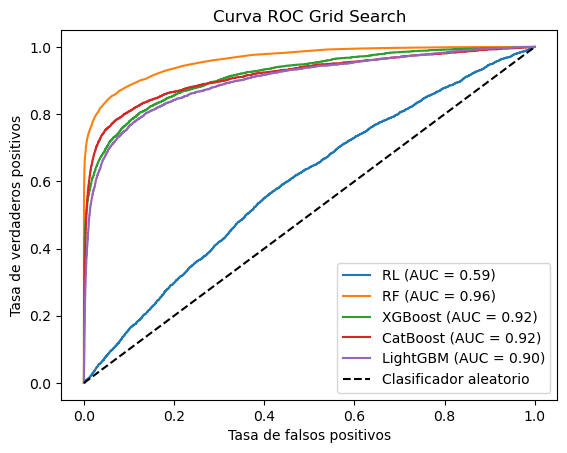

In [33]:
from sklearn.metrics import roc_curve, auc

# Definir los modelos de clasificación y sus nombres

#models = [grid, logreg, rf, xgb_grid_search, cb_grid_search, lbgm_grid_search] 
#model_names = ['SVM', 'RL', 'RF', "XGBoost", "CatBoost", "LightGBM"] 

models = [logreg, rf, xgb_grid_search, cb_grid_search, lbgm_grid_search, 
         # ensemble_model
         ] 
model_names = ['RL', 'RF', "XGBoost", "CatBoost", "LightGBM", 
              # "Ensemble"
              ] 

# Inicializar la figura
fig, ax = plt.subplots()

# Iterar sobre los modelos de clasificación y graficar sus curvas ROC
for i, model in enumerate(models):
    """if model ==  "SVM" or model == "RL":
        fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
        roc_auc = auc(fpr, tpr)
    else:
         # Calcular la curva ROC y el área bajo la curva (AUC)
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)"""
    
    if hasattr(model, "predict_proba"):
        # Calcular la curva ROC y el área bajo la curva (AUC)
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
    elif hasattr(model, "decision_function"):
        # Calcular la curva ROC y el área bajo la curva (AUC)
        fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = roc_auc_score(y_test, model.predict(X_test), average='weighted')

    
   
    # Graficar la curva ROC
    ax.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Agregar la línea de referencia diagonal
ax.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')

# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Tasa de falsos positivos')
ax.set_ylabel('Tasa de verdaderos positivos')
ax.set_title('Curva ROC Grid Search')
ax.legend()

# Mostrar la figura
plt.show()


In [37]:
# predichos
y_pred_rl = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb_grid_search.predict(X_test)
y_pred_cb = cb_grid_search.predict(X_test)
y_pred_lgbm = lbgm_grid_search.predict(X_test)

In [40]:
# Crear el DataFrame
data_FN = {
    'Cluster_test': Cluster_test,
    'y_test': y_test,
    'y_pred_rl': y_pred_rl,
    'y_pred_rf': y_pred_rf,
    'y_pred_xgb': y_pred_xgb,
    'y_pred_cb': y_pred_cb,
    'y_pred_lgbm': y_pred_lgbm,
    #'y_ensemble_model': y_ensemble_model
}

df_FN = pd.DataFrame(data_FN)
df_FN = df_FN.reset_index()

In [41]:
df_FN.head()

,index,Cluster_test,y_test,y_pred_rl,y_pred_rf,y_pred_xgb,y_pred_cb,y_pred_lgbm
0,82905,2,0,0,0,0,0,0
1,110532,0,0,1,0,0,0,0
2,141846,1,0,0,0,0,0,0
3,70978,1,0,1,0,1,0,0
4,48905,0,0,0,0,0,0,0


In [304]:
prueba = df_FN[df_FN['Cluster_test'] == 0]

In [320]:
cm_rf_fn = pd.crosstab(
    prueba['y_test'].values,
    prueba['y_pred_rf'].values,
    rownames=['Real'],
    colnames=['Predicción']
)

falsos_negativos = cm_rf_fn.iloc[1, 0]
suma_total = cm_rf_fn.values.sum()
print("Falsos Negativos:", falsos_negativos)
print("Suma total de la matriz de confusión:", suma_total)
print("Longuitud:", len(prueba['y_test']))

Falsos Negativos: 203
Suma total de la matriz de confusión: 11014
Longuitud: 11014


In [308]:
print("Matriz de Confusion de modelo de Ensamble")
print(tabulate(cm_ensemble_model_fn, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de modelo de Ensamble
╒════════╤══════╤═════╕
│   Real │    0 │   1 │
╞════════╪══════╪═════╡
│      0 │ 9992 │  94 │
├────────┼──────┼─────┤
│      1 │  219 │ 709 │
╘════════╧══════╧═════╛
---


In [46]:
from sklearn.metrics import confusion_matrix

In [319]:
# Obtener los valores reales y predichos
y_real = prueba['y_test'].values
y_pred = prueba['y_pred_rf'].values

# Calcular la matriz de confusión
cm = confusion_matrix(y_real, y_pred)

# Crear un DataFrame a partir de la matriz de confusión
df_cm = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Imprimir el DataFrame de la matriz de confusión
df_cm

,Predicted 0,Predicted 1
Actual 0,10022,64
Actual 1,203,725


In [321]:
false_negatives = cm_rf_fn.loc[1, 0]  # Obtener el número de falsos negativos
actual_negatives = cm_rf_fn.loc[1, :].sum()  # Obtener el total de casos negativos reales

false_negative_rate = false_negatives / actual_negatives  # Calcular la tasa de falsos negativos

print('Falsos negativos:', false_negatives)
print('Total clasificados como negativo:', actual_negatives)
print('tasa de falsos negativos:', false_negative_rate)

Falsos negativos: 203
Total clasificados como negativo: 928
tasa de falsos negativos: 0.21875


In [323]:
#cluster 1
prueba1 = df_FN[df_FN['Cluster_test'] == 1]
cm_rf_fn1 = pd.crosstab(
    prueba1['y_test'].values,
    prueba1['y_pred_rf'].values,
    rownames=['Real'],
    colnames=['Predicción']
)

false_negatives1 = cm_rf_fn1.loc[1, 0]  # Obtener el número de falsos negativos
actual_negatives1 = cm_rf_fn1.loc[1, :].sum()  # Obtener el total de casos negativos reales

false_negative_rate1 = false_negatives1 / actual_negatives1  # Calcular la tasa de falsos negativos

print('Falsos negativos:', false_negatives1)
print('Total clasificados como positivos:', actual_negatives1)
print('tasa de falsos negativos:', false_negative_rate1)

Falsos negativos: 216
Total clasificados como negativo: 706
tasa de falsos negativos: 0.3059490084985836


In [43]:
def false_negative_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fn = cm[1, 0]  # Falsos negativos: predicción negativa, pero verdadero positivo
    total_positives = cm[1, :].sum()  # Total de positivos
    return fn / total_positives

def total_positives(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fn = cm[1, 0]  # Falsos negativos: predicción negativa, pero verdadero positivo
    total_positives = cm[1, :].sum()  # Total de positivos
    return total_positives

#false_negative_rate(prueba1['y_test'].values, prueba1['y_pred_rf'].values)
#total_positives(prueba1['y_test'].values, prueba1['y_pred_rf'].values)

In [341]:
false_negative_rate(y_test, y_ensemble_model)

0.29456771231828616

In [44]:
# Resetear el índice de y_test
y_test = y_test.reset_index(drop=True)

In [47]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Inicializar una lista para almacenar los resultados de la tasa de falsos negativos
fns_bootstrap = []

# Realizar bootstrap
for _ in range(n_bootstrap):
    # Generar una muestra de índices bootstrap
    bootstrap_indices = np.random.choice(range(len(y_pred_rl)), size=len(y_pred_rl), replace=True)
    
    # Obtener los elementos correspondientes en y_pred_bayes_xgb y y_test_reset usando los índices bootstrap
    bootstrap_sample_ensemble = y_pred_rl[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    
    # Calcular la tasa de falsos negativos para la muestra bootstrap actual
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95%
lower_bound = np.percentile(fns_bootstrap, 2.5)
upper_bound = np.percentile(fns_bootstrap, 97.5)

print('INTERVALO DE CONFIANZA TFN Regresión Logística')
print('Tasa de Falsos Negativos para Regresión Logística: {:.4f}'.format(false_negative_rate(y_test, y_pred_rl))) 
print("Intervalo de confianza (95%): [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


INTERVALO DE CONFIANZA TFN Regresión Logística
Tasa de Falsos Negativos para Regresión Logística: 0.4305
Intervalo de confianza (95%): [0.4154, 0.4456]


In [136]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Inicializar una lista para almacenar los resultados de la tasa de falsos negativos
fns_bootstrap_rf = []

# Realizar bootstrap
for _ in range(n_bootstrap):
    # Generar una muestra de índices bootstrap
    bootstrap_indices = np.random.choice(range(len(y_pred_rf)), size=len(y_pred_rf), replace=True)
    
    # Obtener los elementos correspondientes en y_pred_bayes_xgb y y_test_reset usando los índices bootstrap
    bootstrap_sample_ensemble = y_pred_rf[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    
    # Calcular la tasa de falsos negativos para la muestra bootstrap actual
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap_rf.append(fn_rate)

# Calcular el intervalo de confianza del 95%
lower_bound = np.percentile(fns_bootstrap, 2.5)
upper_bound = np.percentile(fns_bootstrap, 97.5)

print('INTERVALO DE CONFIANZA TFN RANDOM FOREST')
print('Tasa de Falsos Negativos para RANDOM FOREST: {:.4f}'.format(false_negative_rate(y_test, y_pred_rf))) 
print("Intervalo de confianza (95%): [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


INTERVALO DE CONFIANZA TFN RANDOM FOREST
Tasa de Falsos Negativos para RANDOM FOREST: 0.2762
Intervalo de confianza (95%): [0.2626, 0.2901]


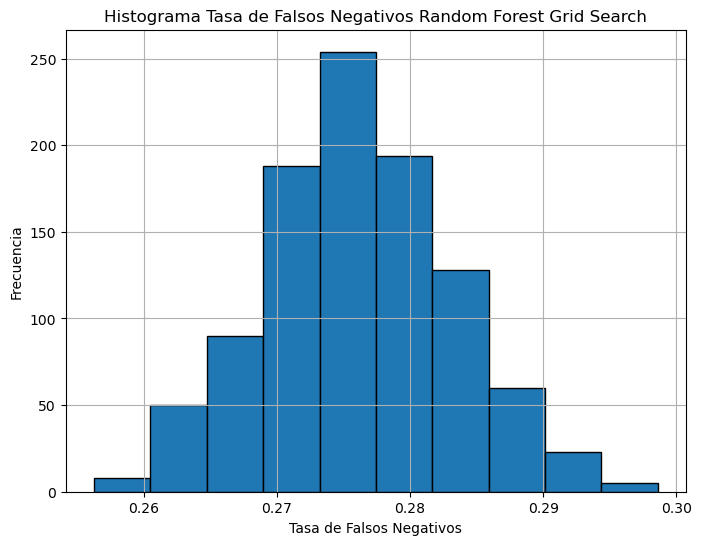

In [137]:
# Graficar el histograma
plt.figure(figsize=(8, 6))
plt.hist(fns_bootstrap_rf, bins=10, edgecolor='black')
plt.xlabel('Tasa de Falsos Negativos')
plt.ylabel('Frecuencia')
plt.title('Histograma Tasa de Falsos Negativos Random Forest Grid Search')
plt.grid(True)
plt.show()

In [49]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Inicializar una lista para almacenar los resultados de la tasa de falsos negativos
fns_bootstrap = []

# Realizar bootstrap
for _ in range(n_bootstrap):
    # Generar una muestra de índices bootstrap
    bootstrap_indices = np.random.choice(range(len(y_pred_xgb)), size=len(y_pred_xgb), replace=True)
    
    # Obtener los elementos correspondientes en y_pred_bayes_xgb y y_test_reset usando los índices bootstrap
    bootstrap_sample_ensemble = y_pred_xgb[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    
    # Calcular la tasa de falsos negativos para la muestra bootstrap actual
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95%
lower_bound = np.percentile(fns_bootstrap, 2.5)
upper_bound = np.percentile(fns_bootstrap, 97.5)

print('INTERVALO DE CONFIANZA TFN XGBoost')
print('Tasa de Falsos Negativos para XGBoost: {:.4f}'.format(false_negative_rate(y_test, y_pred_xgb))) 
print("Intervalo de confianza (95%): [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


INTERVALO DE CONFIANZA TFN XGBoost
Tasa de Falsos Negativos para XGBoost: 0.2492
Intervalo de confianza (95%): [0.2356, 0.2629]


In [50]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Inicializar una lista para almacenar los resultados de la tasa de falsos negativos
fns_bootstrap = []

# Realizar bootstrap
for _ in range(n_bootstrap):
    # Generar una muestra de índices bootstrap
    bootstrap_indices = np.random.choice(range(len(y_pred_cb)), size=len(y_pred_cb), replace=True)
    
    # Obtener los elementos correspondientes en y_pred_bayes_xgb y y_test_reset usando los índices bootstrap
    bootstrap_sample_ensemble = y_pred_cb[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    
    # Calcular la tasa de falsos negativos para la muestra bootstrap actual
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95%
lower_bound = np.percentile(fns_bootstrap, 2.5)
upper_bound = np.percentile(fns_bootstrap, 97.5)

print('INTERVALO DE CONFIANZA TFN CatBoost')
print('Tasa de Falsos Negativos para CatBoost: {:.4f}'.format(false_negative_rate(y_test, y_pred_cb))) 
print("Intervalo de confianza (95%): [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


INTERVALO DE CONFIANZA TFN CatBoost
Tasa de Falsos Negativos para CatBoost: 0.2423
Intervalo de confianza (95%): [0.2295, 0.2558]


In [51]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Inicializar una lista para almacenar los resultados de la tasa de falsos negativos
fns_bootstrap = []

# Realizar bootstrap
for _ in range(n_bootstrap):
    # Generar una muestra de índices bootstrap
    bootstrap_indices = np.random.choice(range(len(y_pred_lgbm)), size=len(y_pred_lgbm), replace=True)
    
    # Obtener los elementos correspondientes en y_pred_bayes_xgb y y_test_reset usando los índices bootstrap
    bootstrap_sample_ensemble = y_pred_lgbm[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    
    # Calcular la tasa de falsos negativos para la muestra bootstrap actual
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95%
lower_bound = np.percentile(fns_bootstrap, 2.5)
upper_bound = np.percentile(fns_bootstrap, 97.5)

print('INTERVALO DE CONFIANZA TFN LightGBM')
print('Tasa de Falsos Negativos para LightGBM: {:.4f}'.format(false_negative_rate(y_test, y_pred_lgbm))) 
print("Intervalo de confianza (95%): [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


INTERVALO DE CONFIANZA TFN LightGBM
Tasa de Falsos Negativos para LightGBM: 0.2629
Intervalo de confianza (95%): [0.2492, 0.2782]


In [63]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred_xgb)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred_xgb)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_rf)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_rf)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN RF vs XGBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN RF vs XGBoost
Diferencia de proporciones: 0.02703391991838816
Valor p: 0.006530946145533555
Intervalo de confianza: (-0.0004995434017189826, 0.05456738323849533)


In [58]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred_cb)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred_cb)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_rf)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_rf)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN RF vs CatBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN RF vs CatBoost
Diferencia de proporciones: 0.03391991838816627
Valor p: 0.0006097292663898693
Intervalo de confianza: (0.006513759126141494, 0.061326077650191074)


In [65]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred_lgbm)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred_lgbm)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_rf)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_rf)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN RF vs LightGBM")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN RF vs LightGBM
Diferencia de proporciones: 0.013261922978831941
Valor p: 0.18573112033015093
Intervalo de confianza: (-0.014512512820176737, 0.04103635877784065)


In [60]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred_lgbm)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred_lgbm)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_xgb)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_xgb)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN XGBoost vs LightGBM")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN XGBoost vs LightGBM
Diferencia de proporciones: -0.01377199693955622
Valor p: 0.16236936140650937
Intervalo de confianza: (-0.041089873588972786, 0.013545879709860348)


In [61]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred_cb)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred_cb)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_xgb)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_xgb)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN XGBoost vs CatBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN XGBoost vs CatBoost
Diferencia de proporciones: 0.00688599846977811
Valor p: 0.478817999342958
Intervalo de confianza: (-0.020063601642654555, 0.033835598582210774)


In [64]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred_cb)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred_cb)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_lgbm)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_lgbm)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN LighGBM vs CatBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN LighGBM vs CatBoost
Diferencia de proporciones: 0.02065799540933433
Valor p: 0.03528361324708876
Intervalo de confianza: (-0.006532577181999871, 0.04784856800066853)


In [66]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Lista para almacenar los resultados de los intervalos de confianza
intervalos_confianza = []

# Realizar el ciclo para cada cluster
for cluster in df_FN['Cluster_test'].unique():
    # Obtener los datos correspondientes al cluster actual
    y_test_cluster = df_FN[df_FN['Cluster_test'] == cluster]['y_test']
    y_pred_rf_cluster = df_FN[df_FN['Cluster_test'] == cluster]['y_pred_rf']
    
    # Lista para almacenar los resultados de la tasa de falsos negativos bootstrap
    fns_bootstrap = []
    
    # Realizar bootstrap
    for _ in range(n_bootstrap):
        # Generar una muestra de índices bootstrap
        bootstrap_indices = np.random.choice(range(len(y_pred_rf_cluster)), size=len(y_pred_rf_cluster), replace=True)
        
        # Obtener los elementos correspondientes en y_pred_rf_cluster y y_test_cluster usando los índices bootstrap
        bootstrap_sample_ensemble = y_pred_rf_cluster.iloc[bootstrap_indices]
        bootstrap_sample_test = y_test_cluster.iloc[bootstrap_indices]
        
        # Calcular la tasa de falsos negativos para la muestra bootstrap actual
        fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
        fns_bootstrap.append(fn_rate)
    
    # Calcular el intervalo de confianza del 95% para el cluster actual
    lower_bound = np.percentile(fns_bootstrap, 2.5)
    upper_bound = np.percentile(fns_bootstrap, 97.5)
    
    # Agregar los resultados a la lista de intervalos de confianza
    intervalos_confianza.append((lower_bound, upper_bound))
    
# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame({
    'Cluster': df_FN['Cluster_test'].unique(),
    'TFN_RF': [false_negative_rate(df_FN[df_FN['Cluster_test'] == cluster]['y_test'], df_FN[df_FN['Cluster_test'] == cluster]['y_pred_rf']) for cluster in df_FN['Cluster_test'].unique()],
    'Intervalo Inferior': [intervalo[0] for intervalo in intervalos_confianza],
    'Intervalo Superior': [intervalo[1] for intervalo in intervalos_confianza]
})

# Imprimir el DataFrame de resultados
resultados_df

,Cluster,TFN_RF,Intervalo Inferior,Intervalo Superior
0,2,0.213836,0.176697,0.251046
1,0,0.238147,0.210642,0.265608
2,1,0.311615,0.276054,0.347178
3,3,0.298343,0.276073,0.319105


In [83]:
import pandas as pd
import statsmodels.stats.proportion as prop

# Crear un DataFrame vacío para almacenar los resultados
results_df = pd.DataFrame(columns=['Cluster', 'Diferencia de proporciones', 'Valor p', 'Intervalo de confianza'])

# Calcular los valores de referencia para el cluster 0
n0 = total_positives(df_FN[df_FN['Cluster_test'] == 0]['y_test'], df_FN[df_FN['Cluster_test'] == 0]['y_pred_rf'])
p0 = false_negative_rate(df_FN[df_FN['Cluster_test'] == 0]['y_test'], df_FN[df_FN['Cluster_test'] == 0]['y_pred_rf'])

# Iterar sobre cada clúster
for cluster in df_FN['Cluster_test'].unique():
    # Filtrar los datos por clúster
    cluster_data = df_FN[df_FN['Cluster_test'] == cluster]
    
    # Obtener el tamaño de la muestra y la proporción del clúster actual
    n = total_positives(cluster_data['y_test'], cluster_data['y_pred_rf'])
    p = false_negative_rate(cluster_data['y_test'], cluster_data['y_pred_rf'])
    
    # Calcular la diferencia de proporciones
    diff_prop = p - p0
    
    # Realizar la prueba de hipótesis utilizando prop.proportions_ztest()
    z_score, p_value = prop.proportions_ztest([n * p, n0 * p0], [n, n0])
    
    # Calcular el intervalo de confianza
    conf_int = prop.proportion_confint(n * p, n)
    
    # Agregar los resultados al DataFrame
    results_df = results_df.append({'Cluster': cluster,
                                    'Diferencia de proporciones': diff_prop,
                                    'Valor p': p_value,
                                    'Intervalo de confianza': conf_int}, ignore_index=True)

# Imprimir el DataFrame de resultados
results_df

cluster_0 = results_df

cluster_0

,Cluster,Diferencia de proporciones,Valor p,Intervalo de confianza
0,2,-0.024310,0.305119,"(0.1770416953077143, 0.2506312606671285)"
1,0,0.000000,1.000000,"(0.2107414151687701, 0.26555168827950576)"
2,1,0.073468,0.000919,"(0.27745058917847587, 0.3457788725778981)"
3,3,0.060196,0.000874,"(0.27726456235794966, 0.31942052051497855)"


In [88]:
import pandas as pd
import statsmodels.stats.proportion as prop

# Crear un DataFrame vacío para almacenar los resultados
results_df = pd.DataFrame(columns=['Cluster', 'Diferencia de proporciones', 'Valor p', 'Intervalo de confianza'])

# Calcular los valores de referencia para el cluster 1
n0 = total_positives(df_FN[df_FN['Cluster_test'] == 1]['y_test'], df_FN[df_FN['Cluster_test'] == 1]['y_pred_rf'])
p0 = false_negative_rate(df_FN[df_FN['Cluster_test'] == 1]['y_test'], df_FN[df_FN['Cluster_test'] == 1]['y_pred_rf'])

# Iterar sobre cada clúster
for cluster in df_FN['Cluster_test'].unique():
    # Filtrar los datos por clúster
    cluster_data = df_FN[df_FN['Cluster_test'] == cluster]
    
    # Obtener el tamaño de la muestra y la proporción del clúster actual
    n = total_positives(cluster_data['y_test'], cluster_data['y_pred_rf'])
    p = false_negative_rate(cluster_data['y_test'], cluster_data['y_pred_rf'])
    
    # Calcular la diferencia de proporciones
    diff_prop = p - p0
    
    # Realizar la prueba de hipótesis utilizando prop.proportions_ztest()
    z_score, p_value = prop.proportions_ztest([n * p, n0 * p0], [n, n0])
    
    # Calcular el intervalo de confianza
    conf_int = prop.proportion_confint(n * p, n)
    
    # Agregar los resultados al DataFrame
    results_df = results_df.append({'Cluster': cluster,
                                    'Diferencia de proporciones': diff_prop,
                                    'Valor p': p_value,
                                    'Intervalo de confianza': conf_int}, ignore_index=True)

cluster_1 = results_df

cluster_1

,Cluster,Diferencia de proporciones,Valor p,Intervalo de confianza
0,2,-0.097778,0.000210,"(0.1770416953077143, 0.2506312606671285)"
1,0,-0.073468,0.000919,"(0.2107414151687701, 0.26555168827950576)"
2,1,0.000000,1.000000,"(0.27745058917847587, 0.3457788725778981)"
3,3,-0.013272,0.514766,"(0.27726456235794966, 0.31942052051497855)"


In [85]:
import pandas as pd
import statsmodels.stats.proportion as prop

# Crear un DataFrame vacío para almacenar los resultados
results_df = pd.DataFrame(columns=['Cluster', 'Diferencia de proporciones', 'Valor p', 'Intervalo de confianza'])

# Calcular los valores de referencia para el cluster 2
n0 = total_positives(df_FN[df_FN['Cluster_test'] == 2]['y_test'], df_FN[df_FN['Cluster_test'] == 2]['y_pred_rf'])
p0 = false_negative_rate(df_FN[df_FN['Cluster_test'] == 2]['y_test'], df_FN[df_FN['Cluster_test'] == 2]['y_pred_rf'])

# Iterar sobre cada clúster
for cluster in df_FN['Cluster_test'].unique():
    # Filtrar los datos por clúster
    cluster_data = df_FN[df_FN['Cluster_test'] == cluster]
    
    # Obtener el tamaño de la muestra y la proporción del clúster actual
    n = total_positives(cluster_data['y_test'], cluster_data['y_pred_rf'])
    p = false_negative_rate(cluster_data['y_test'], cluster_data['y_pred_rf'])
    
    # Calcular la diferencia de proporciones
    diff_prop = p - p0
    
    # Realizar la prueba de hipótesis utilizando prop.proportions_ztest()
    z_score, p_value = prop.proportions_ztest([n * p, n0 * p0], [n, n0])
    
    # Calcular el intervalo de confianza
    conf_int = prop.proportion_confint(n * p, n)
    
    # Agregar los resultados al DataFrame
    results_df = results_df.append({'Cluster': cluster,
                                    'Diferencia de proporciones': diff_prop,
                                    'Valor p': p_value,
                                    'Intervalo de confianza': conf_int}, ignore_index=True)

# Imprimir el DataFrame de resultados
cluster_2 = results_df

cluster_2

,Cluster,Diferencia de proporciones,Valor p,Intervalo de confianza
0,2,0.000000,1.000000,"(0.1770416953077143, 0.2506312606671285)"
1,0,0.024310,0.305119,"(0.2107414151687701, 0.26555168827950576)"
2,1,0.097778,0.000210,"(0.27745058917847587, 0.3457788725778981)"
3,3,0.084506,0.000258,"(0.27726456235794966, 0.31942052051497855)"


In [86]:
import pandas as pd
import statsmodels.stats.proportion as prop

# Crear un DataFrame vacío para almacenar los resultados
results_df = pd.DataFrame(columns=['Cluster', 'Diferencia de proporciones', 'Valor p', 'Intervalo de confianza'])

# Calcular los valores de referencia para el cluster 3
n0 = total_positives(df_FN[df_FN['Cluster_test'] == 3]['y_test'], df_FN[df_FN['Cluster_test'] == 3]['y_pred_rf'])
p0 = false_negative_rate(df_FN[df_FN['Cluster_test'] == 3]['y_test'], df_FN[df_FN['Cluster_test'] == 3]['y_pred_rf'])

# Iterar sobre cada clúster
for cluster in df_FN['Cluster_test'].unique():
    # Filtrar los datos por clúster
    cluster_data = df_FN[df_FN['Cluster_test'] == cluster]
    
    # Obtener el tamaño de la muestra y la proporción del clúster actual
    n = total_positives(cluster_data['y_test'], cluster_data['y_pred_rf'])
    p = false_negative_rate(cluster_data['y_test'], cluster_data['y_pred_rf'])
    
    # Calcular la diferencia de proporciones
    diff_prop = p - p0
    
    # Realizar la prueba de hipótesis utilizando prop.proportions_ztest()
    z_score, p_value = prop.proportions_ztest([n * p, n0 * p0], [n, n0])
    
    # Calcular el intervalo de confianza
    conf_int = prop.proportion_confint(n * p, n)
    
    # Agregar los resultados al DataFrame
    results_df = results_df.append({'Cluster': cluster,
                                    'Diferencia de proporciones': diff_prop,
                                    'Valor p': p_value,
                                    'Intervalo de confianza': conf_int}, ignore_index=True)

# Imprimir el DataFrame de resultados
cluster_3 = results_df

cluster_3


,Cluster,Diferencia de proporciones,Valor p,Intervalo de confianza
0,2,-0.084506,0.000258,"(0.1770416953077143, 0.2506312606671285)"
1,0,-0.060196,0.000874,"(0.2107414151687701, 0.26555168827950576)"
2,1,0.013272,0.514766,"(0.27745058917847587, 0.3457788725778981)"
3,3,0.000000,1.000000,"(0.27726456235794966, 0.31942052051497855)"


In [89]:
cluster_1['Valor p']

0    0.000210
1    0.000919
2    1.000000
3    0.514766
Name: Valor p, dtype: float64

In [95]:
p = pd.merge(cluster_1[['Cluster','Valor p']], cluster_2[['Cluster','Valor p']], on="Cluster", how="inner")
d = d.rename(columns={'Valor p_x': 'Valor p Cluster 1', 'Valor p_y': 'Valor p Cluster 2'})
d

,Cluster,Valor p Cluster 1,Valor p Cluster 2
0,2,0.000210,1.000000
1,0,0.000919,0.305119
2,1,1.000000,0.000210
3,3,0.514766,0.000258


In [96]:
p = pd.merge(cluster_0[['Cluster','Valor p']], cluster_3[['Cluster','Valor p']], on="Cluster", how="inner")
p = p.rename(columns={'Valor p_x': 'Valor p Cluster 0', 'Valor p_y': 'Valor p Cluster 3'})
p

,Cluster,Valor p Cluster 0,Valor p Cluster 3
0,2,0.305119,0.000258
1,0,1.000000,0.000874
2,1,0.000919,0.514766
3,3,0.000874,1.000000


In [101]:
e = pd.merge(d, p, on = "Cluster", how = "inner")
e = e.sort_values(by='Cluster')
e

,Cluster,Valor p Cluster 1,Valor p Cluster 2,Valor p Cluster 0,Valor p Cluster 3
1,0,0.000919,0.305119,1.000000,0.000874
2,1,1.000000,0.000210,0.000919,0.514766
0,2,0.000210,1.000000,0.305119,0.000258
3,3,0.514766,0.000258,0.000874,1.000000


In [78]:
# Generar la tabla en formato LaTeX
latex_table = results_df[['Cluster', 'Valor p']].to_latex(index=False, caption='Valores p por clúster')

# Imprimir la tabla en LaTeX
print(latex_table)

\begin{table}
\centering
\caption{Valores p por clúster}
\begin{tabular}{lr}
\toprule
Cluster &  Valor p \\
\midrule
      2 & 0.000258 \\
      0 & 0.000874 \\
      1 & 0.514766 \\
      3 & 1.000000 \\
\bottomrule
\end{tabular}
\end{table}



In [70]:
df_FN[df_FN['Cluster_test'] == 0]['y_test']

1        0
4        0
5        0
8        0
19       0
        ..
44156    0
44159    0
44162    0
44168    0
44169    0
Name: y_test, Length: 11014, dtype: int64

In [72]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
cluster_2_data = df_FN[df_FN['Cluster_test'] == 2]
n2 = len(cluster_2_data)  # Tamaño de la muestra del clúster 2
p2 = false_negative_rate(cluster_2_data['y_test'], cluster_2_data['y_pred_rf'])  # Proporción del clúster 2

cluster_0_data = df_FN[df_FN['Cluster_test'] == 0]
n0 = len(cluster_0_data)  # Tamaño de la muestra del clúster 0
p0 = false_negative_rate(cluster_0_data['y_test'], cluster_0_data['y_pred_rf'])  # Proporción del clúster 0

# Calcular los éxitos en cada grupo
successes0 = int(n0 * p0)
successes2 = int(n2 * p2)

# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes0, successes2], [n0, n2])

# Calcular el intervalo de confianza
conf_int0 = prop.proportion_confint(successes0, n0)
conf_int2 = prop.proportion_confint(successes2, n2)
conf_int = (conf_int0[0] - conf_int2[1], conf_int0[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN Random Forest")
print("Diferencia de proporciones:", p0 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN Random Forest
Diferencia de proporciones: 0.024310073736716536
Valor p: 0.0033970560150342398
Intervalo de confianza: (0.0025326308763526095, 0.04598220820043844)


In [106]:
import pandas as pd

data = {
    '': ['Random Forest', 'XGBoost', 'CatBoost', 'LightGBM'],
    'Random Forest': [1, 0.0065, 0.0006, 0.1857],
    'XGBoost': [0.0065, 1, 0.4788, 0.1623],
    'CatBoost': [0.0006, 0.4788, 1, 0.0352],
    'LightGBM': [0.1857, 0.1623, 0.0352, 1]
}

df = pd.DataFrame(data)
df.set_index('', inplace=True)

df


,Random Forest,XGBoost,CatBoost,LightGBM
,,,,
Random Forest,1.0000,0.0065,0.0006,0.1857
XGBoost,0.0065,1.0000,0.4788,0.1623
CatBoost,0.0006,0.4788,1.0000,0.0352
LightGBM,0.1857,0.1623,0.0352,1.0000


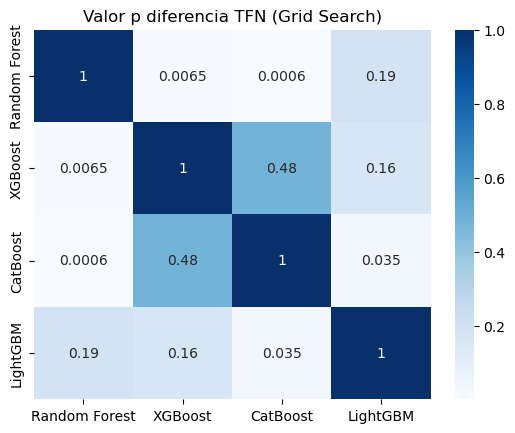

In [111]:
# Generar el heatmap
sns.heatmap(df, annot=True, cmap='Blues')

# Agregar el título y el subtítulo
plt.title('Valor p diferencia TFN (Grid Search)')
#plt.suptitle('Optimización Grid Search')

# Mostrar el heatmap
plt.show()

In [131]:
data = {
    '': ['Clúster 1', 'Clúster 2', 'Clúster 3', 'Clúster 4'],
    'Clúster 1': [1, 0.000919, 0.305119, 0.000874],
    'Clúster 2': [0.000919, 1, 0.000210, 0.514766],
    'Clúster 3': [0.305119, 0.000210, 1, 0.000258],
    'Clúster 4': [0.000874, 0.514766, 0.000258, 1]
}

df = pd.DataFrame(data)
df.set_index('', inplace=True)

df


,Clúster 1,Clúster 2,Clúster 3,Clúster 4
,,,,
Clúster 1,1.000000,0.000919,0.305119,0.000874
Clúster 2,0.000919,1.000000,0.000210,0.514766
Clúster 3,0.305119,0.000210,1.000000,0.000258
Clúster 4,0.000874,0.514766,0.000258,1.000000


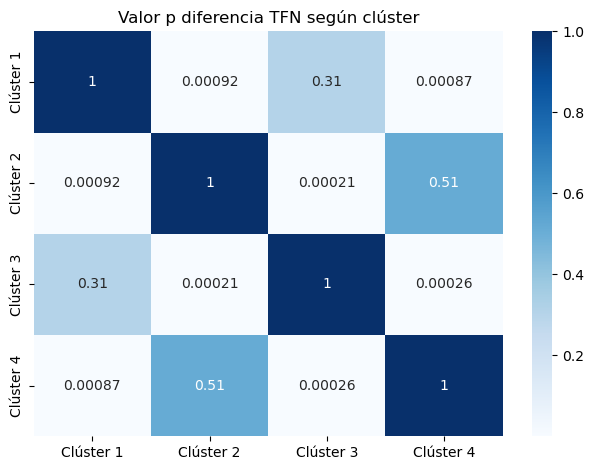

In [132]:
# Generar el heatmap
sns.heatmap(df, annot=True, cmap='Blues')

# Agregar el título y el subtítulo
plt.title('Valor p diferencia TFN según clúster')
#plt.suptitle(, fontsize=12)

# Ajustar el espaciado entre el título y el subtítulo
plt.tight_layout()

# Mostrar el heatmap
plt.show()

In [127]:
X = X.drop(['CLUSTER'], axis = 1)

In [128]:
# Obtener la importancia de las variables
best_estimator = rf.best_estimator_['classifier']

# Obtener la importancia de las variables
importance = best_estimator.feature_importances_
# Crear un DataFrame para visualizar la importancia de las variables
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Ordenar el DataFrame por importancia descendente
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)

   Feature  Importance
4    COMP5    0.035947
25  COMP26    0.025104
36  COMP37    0.023587
2    COMP3    0.023498
0    COMP1    0.022508
..     ...         ...
15  COMP16    0.009591
42  COMP43    0.009152
45  COMP46    0.008971
47  COMP48    0.008297
50  COMP51    0.008189

[62 rows x 2 columns]


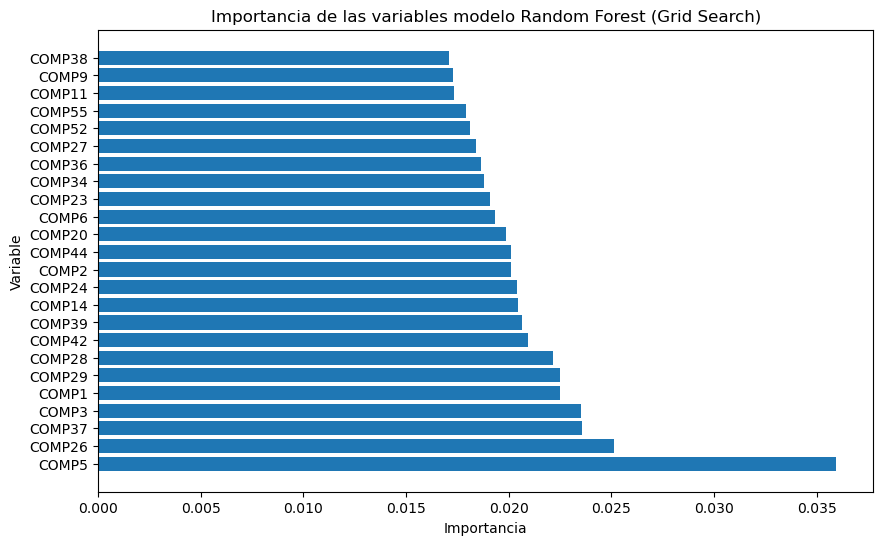

In [130]:
# Calcular la suma acumulada de importancia
importance_df['Cumulative Importance'] = importance_df['Importance'].cumsum()

# Filtrar las variables que sumen hasta el 50%
selected_variables = importance_df[importance_df['Cumulative Importance'] <= 0.5]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(selected_variables['Feature'], selected_variables['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las variables modelo Random Forest (Grid Search)')

# Mostrar el gráfico
plt.show()